In [1]:
import os
import warnings
import sys

import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
PROJ_ROOT_PATH = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(PROJ_ROOT_PATH)
DATA_PATH = os.path.join(PROJ_ROOT_PATH, "datasets")

Для теста буду использовать набор синтетических временных рядов вот отсюда: https://www.kaggle.com/datasets/passwordclassified/synthesised-time-series-data

In [2]:
synthesis_data = pd.read_csv(os.path.join(DATA_PATH, "Synthesised Time Series", "synthesised.csv"), index_col="id")
synthesis_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105
id,,,,,,,,,,,,,,,,,,,,,
0,25.0,25.168857,24.715599,24.277916,24.027045,23.903862,23.099880,22.619502,22.450067,22.136750,...,13.623944,13.656542,13.204566,13.414686,13.518331,13.544479,13.619775,13.679345,13.402996,13.557636
1,21.0,20.764716,19.956948,19.710582,19.301341,18.848625,18.033900,17.989180,17.485504,16.503814,...,16.071742,16.353189,16.918663,17.026205,17.213205,17.646249,17.883727,17.636658,19.453180,20.057058
2,19.0,18.912363,19.582829,19.409292,19.577184,19.987482,20.581422,21.069311,20.915548,21.400714,...,4.488784,4.241661,4.248950,4.143697,4.440768,4.395694,4.133176,4.012145,4.068881,2.916924
3,23.0,22.877990,23.433526,24.324950,24.358498,24.738647,25.654500,25.933526,26.196802,27.099793,...,24.198968,24.048091,23.835752,23.532187,23.426798,23.362099,23.446236,23.666149,21.995872,21.410275
4,25.0,24.971022,24.305882,23.203562,22.440854,21.559851,20.203296,19.479367,18.399220,17.679928,...,10.499446,10.827831,8.113812,8.583054,8.555737,9.514210,9.333950,9.496314,9.628866,8.863811


In [3]:
synthesis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Columns: 1106 entries, 0 to 1105
dtypes: float64(1106)
memory usage: 8.4 MB


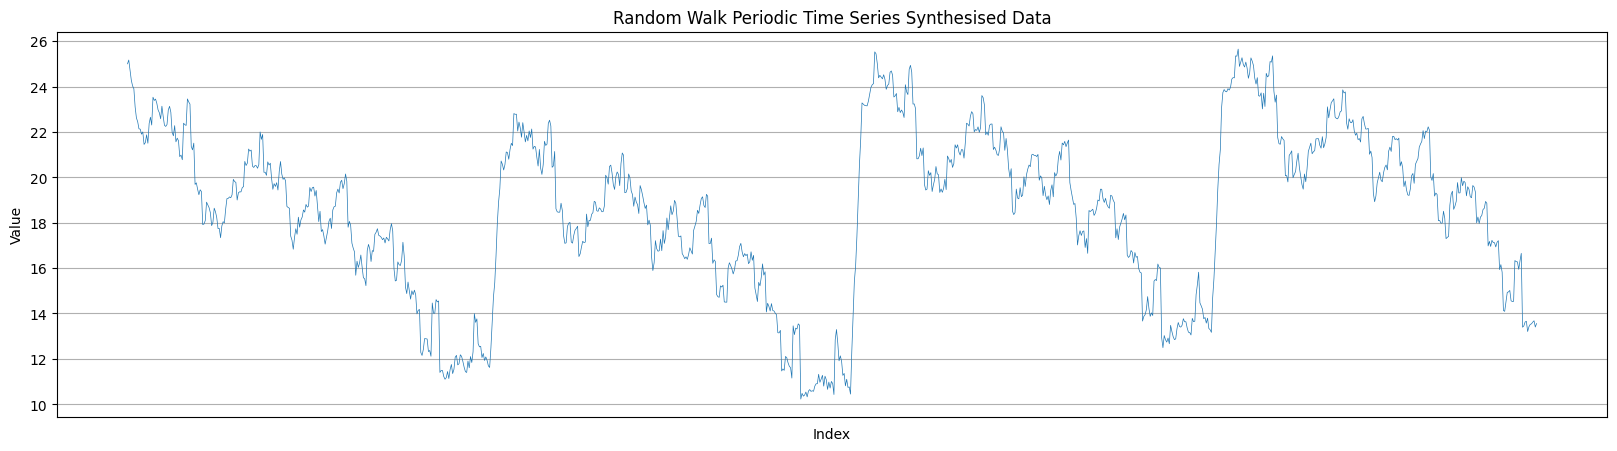

In [3]:
from src.plotting.plot_time_series import plot_timeseries

plot_timeseries(synthesis_data, "Random Walk Periodic Time Series Synthesised Data", 1)

# Методы аппроксимации

1. Для начала воспользуемся простым методом прореживания данных: просто отбрассываем все точки данных кроме n  выбранных.

In [4]:
from methods.lin_approximation.lin_approximation import get_dummy_approximation

approximations = {}

approximations["10 points"] = get_dummy_approximation(synthesis_data, 10)
approximations["20 points"] = get_dummy_approximation(synthesis_data, 20)
approximations["50 points"] = get_dummy_approximation(synthesis_data, 50)
approximations["100 points"] = get_dummy_approximation(synthesis_data, 100)

In [6]:
def plot_approximations(approximations, sample_num = 42):
    fig, axs = plt.subplots(nrows=len(approximations), ncols=1, figsize=(20,len(approximations)*5))

    plt.subplots_adjust(hspace=0.5)
    fig.suptitle("Approximations", fontsize=18, y=0.95)

    for (name, data), ax in zip(approximations.items(), axs.ravel()):
        ax.set_title(name)
        ax.plot(synthesis_data.iloc[sample_num], linewidth=0.5)
        ax.plot(data.iloc[sample_num], linewidth=0.5, color="red")
        ax.set_xticks([])
        ax.set_xlabel("Index")
        ax.set_ylabel("Value")
        ax.grid(True, which="both", axis="both")
    plt.show()

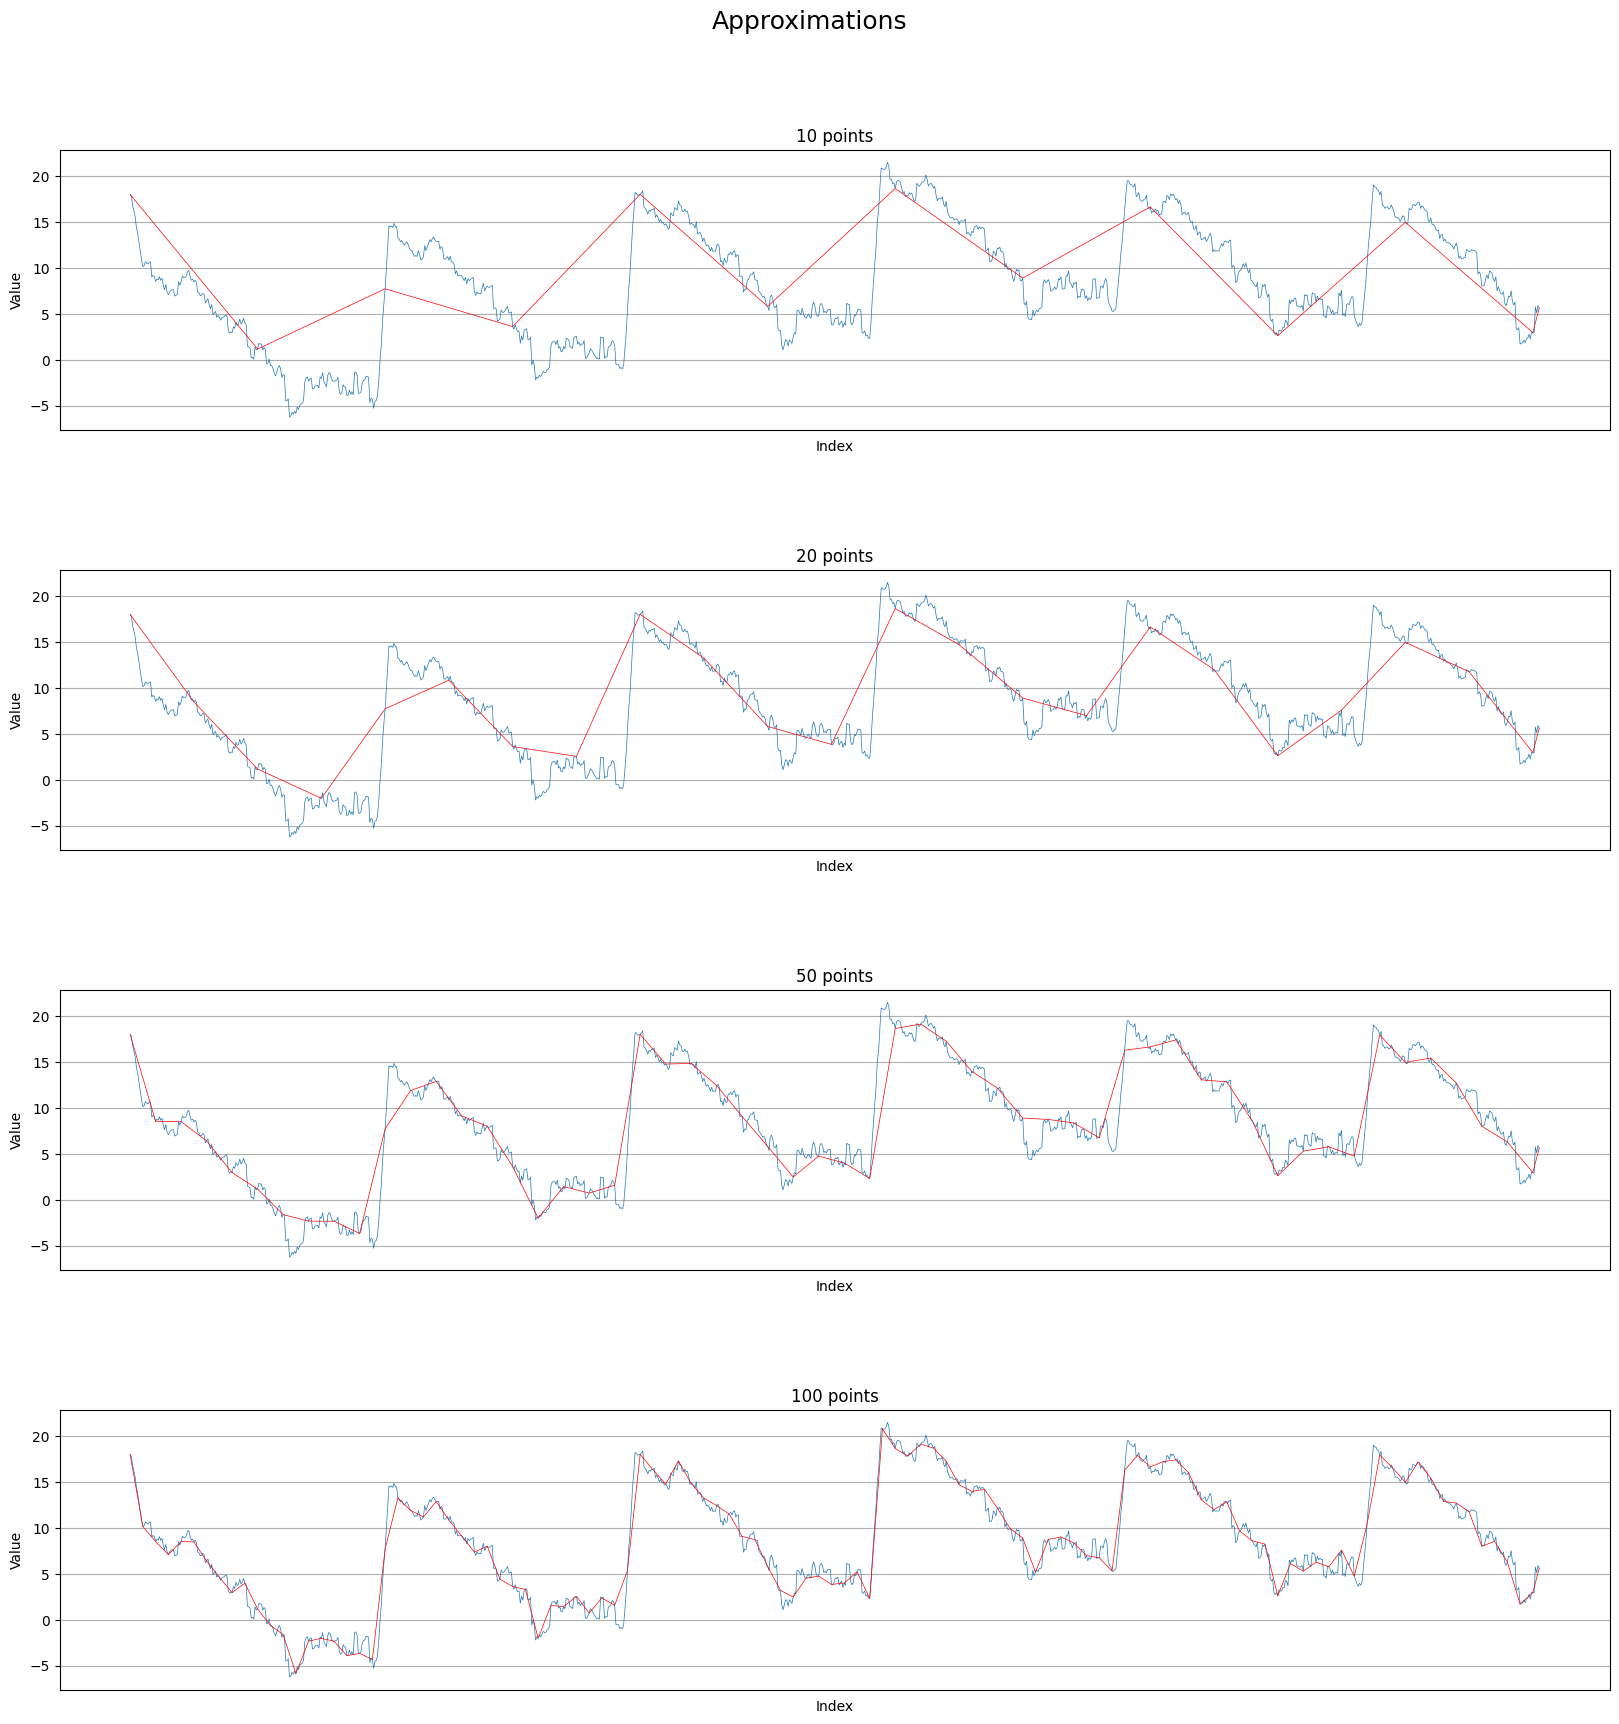

In [6]:
plot_approximations(approximations)

2. Mean Approximation: Теперь разделим область определения ряда на n  отрезков и на каждом из них возьмём среднее из значений точек.

In [7]:
from methods.lin_approximation.lin_approximation import get_linearmean_approximation
approximations = {}

approximations["10 points"] = get_linearmean_approximation(synthesis_data, 10)
approximations["20 points"] = get_linearmean_approximation(synthesis_data, 20)
approximations["50 points"] = get_linearmean_approximation(synthesis_data, 50)
approximations["100 points"] = get_linearmean_approximation(synthesis_data, 100)

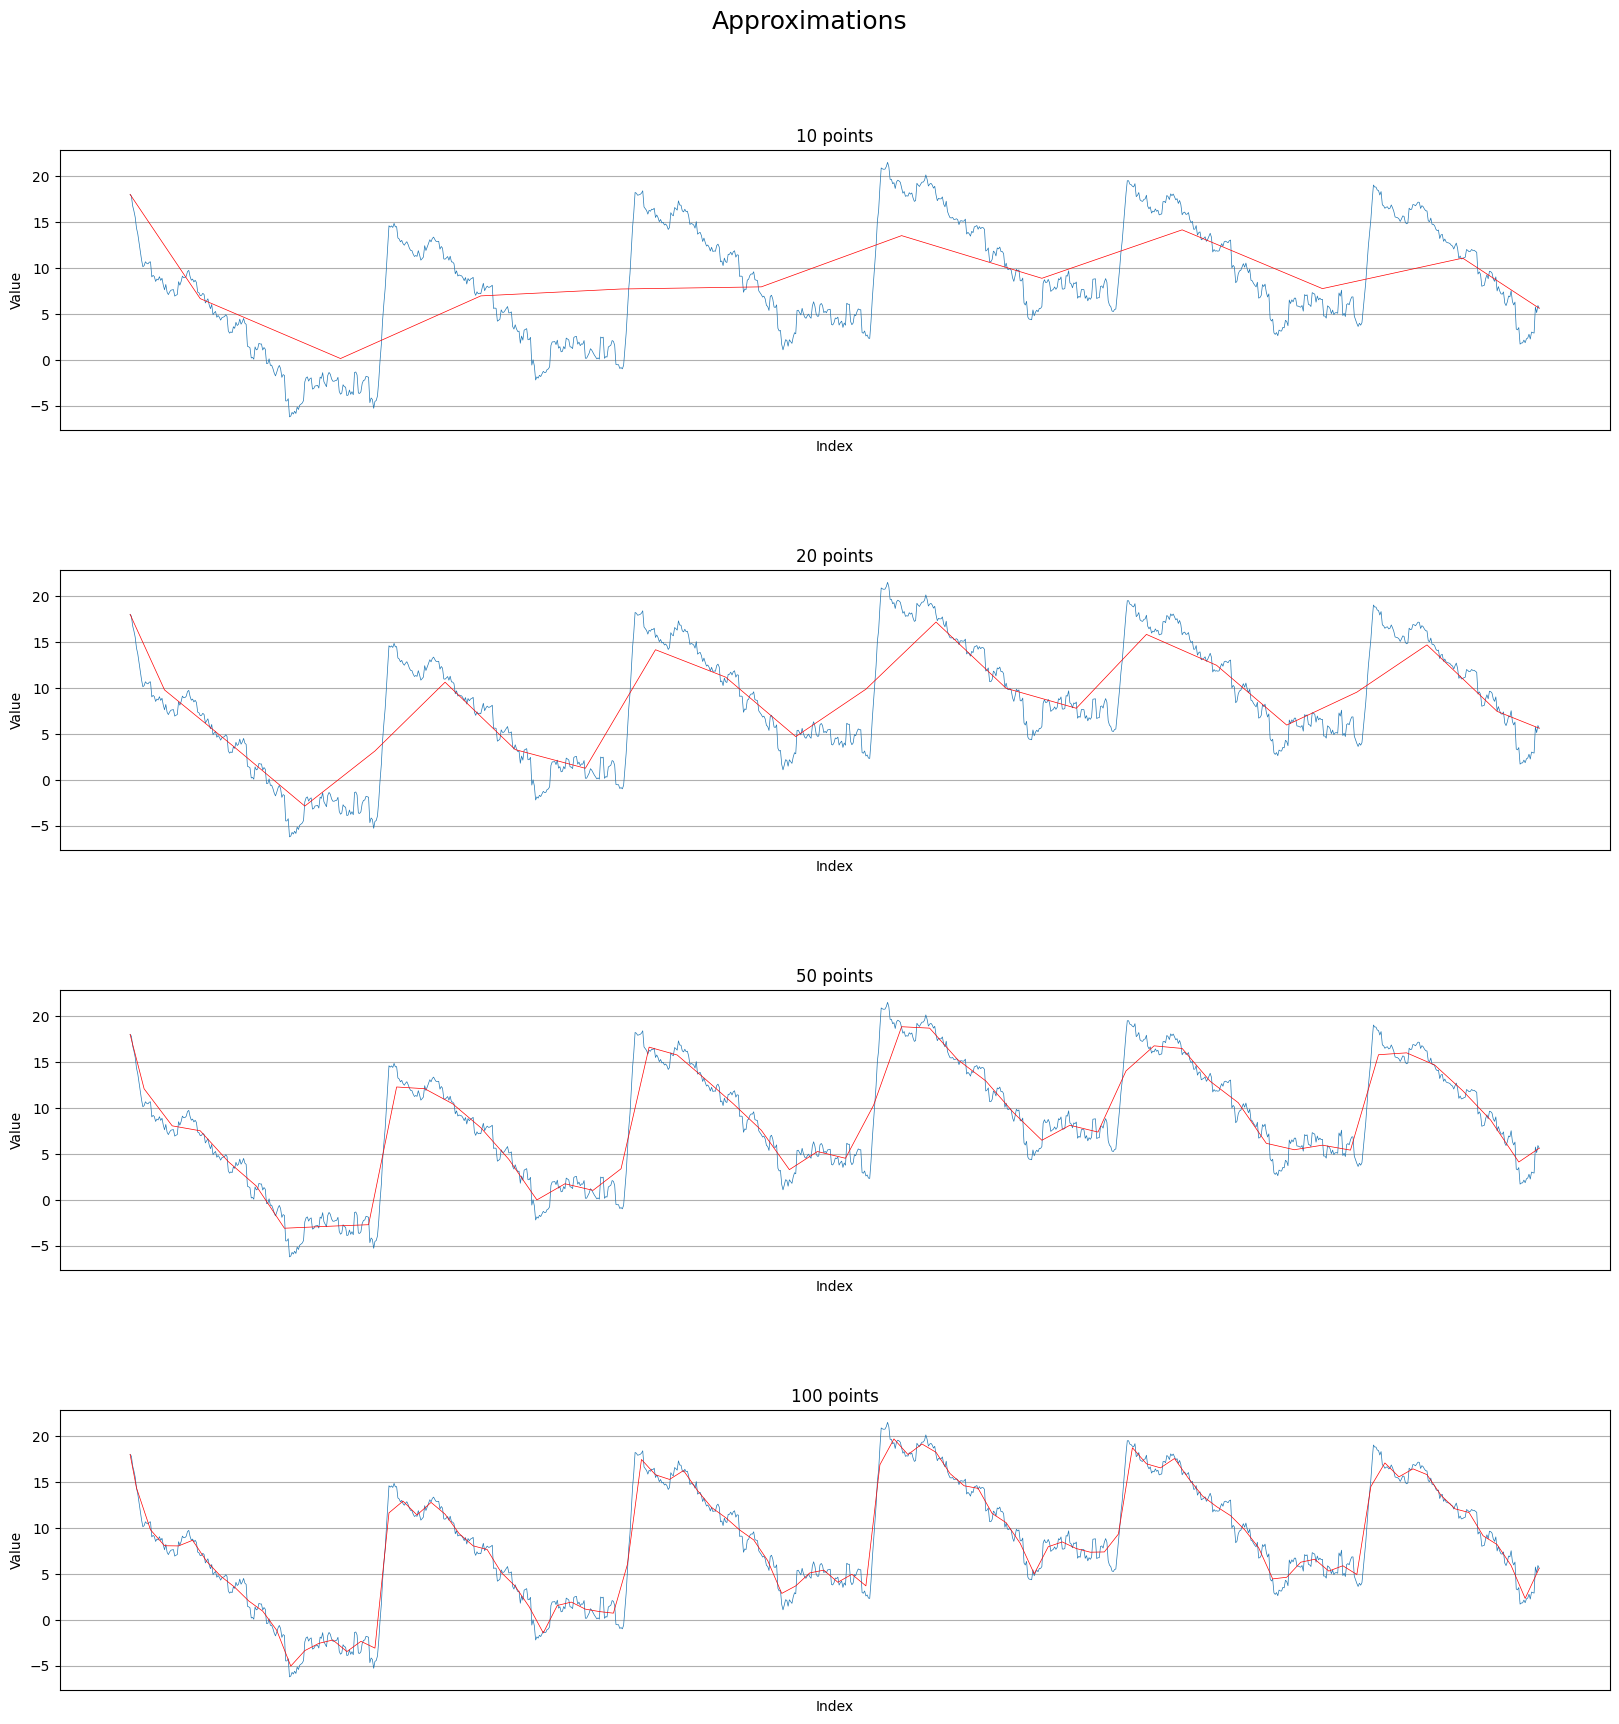

In [8]:
plot_approximations(approximations)

3. PLA approximation: Также разделим область определения на n промежутков но теперь будем пытаться аппроксимировать точки на каждом промежутке с помощью линейной функции.

In [4]:
from methods.lin_approximation.lin_approximation import get_pla_approximation
approximations = {}

approximations["10 points"] = get_pla_approximation(synthesis_data, 10)
approximations["20 points"] = get_pla_approximation(synthesis_data, 20)
approximations["50 points"] = get_pla_approximation(synthesis_data, 50)
approximations["100 points"] = get_pla_approximation(synthesis_data, 100)

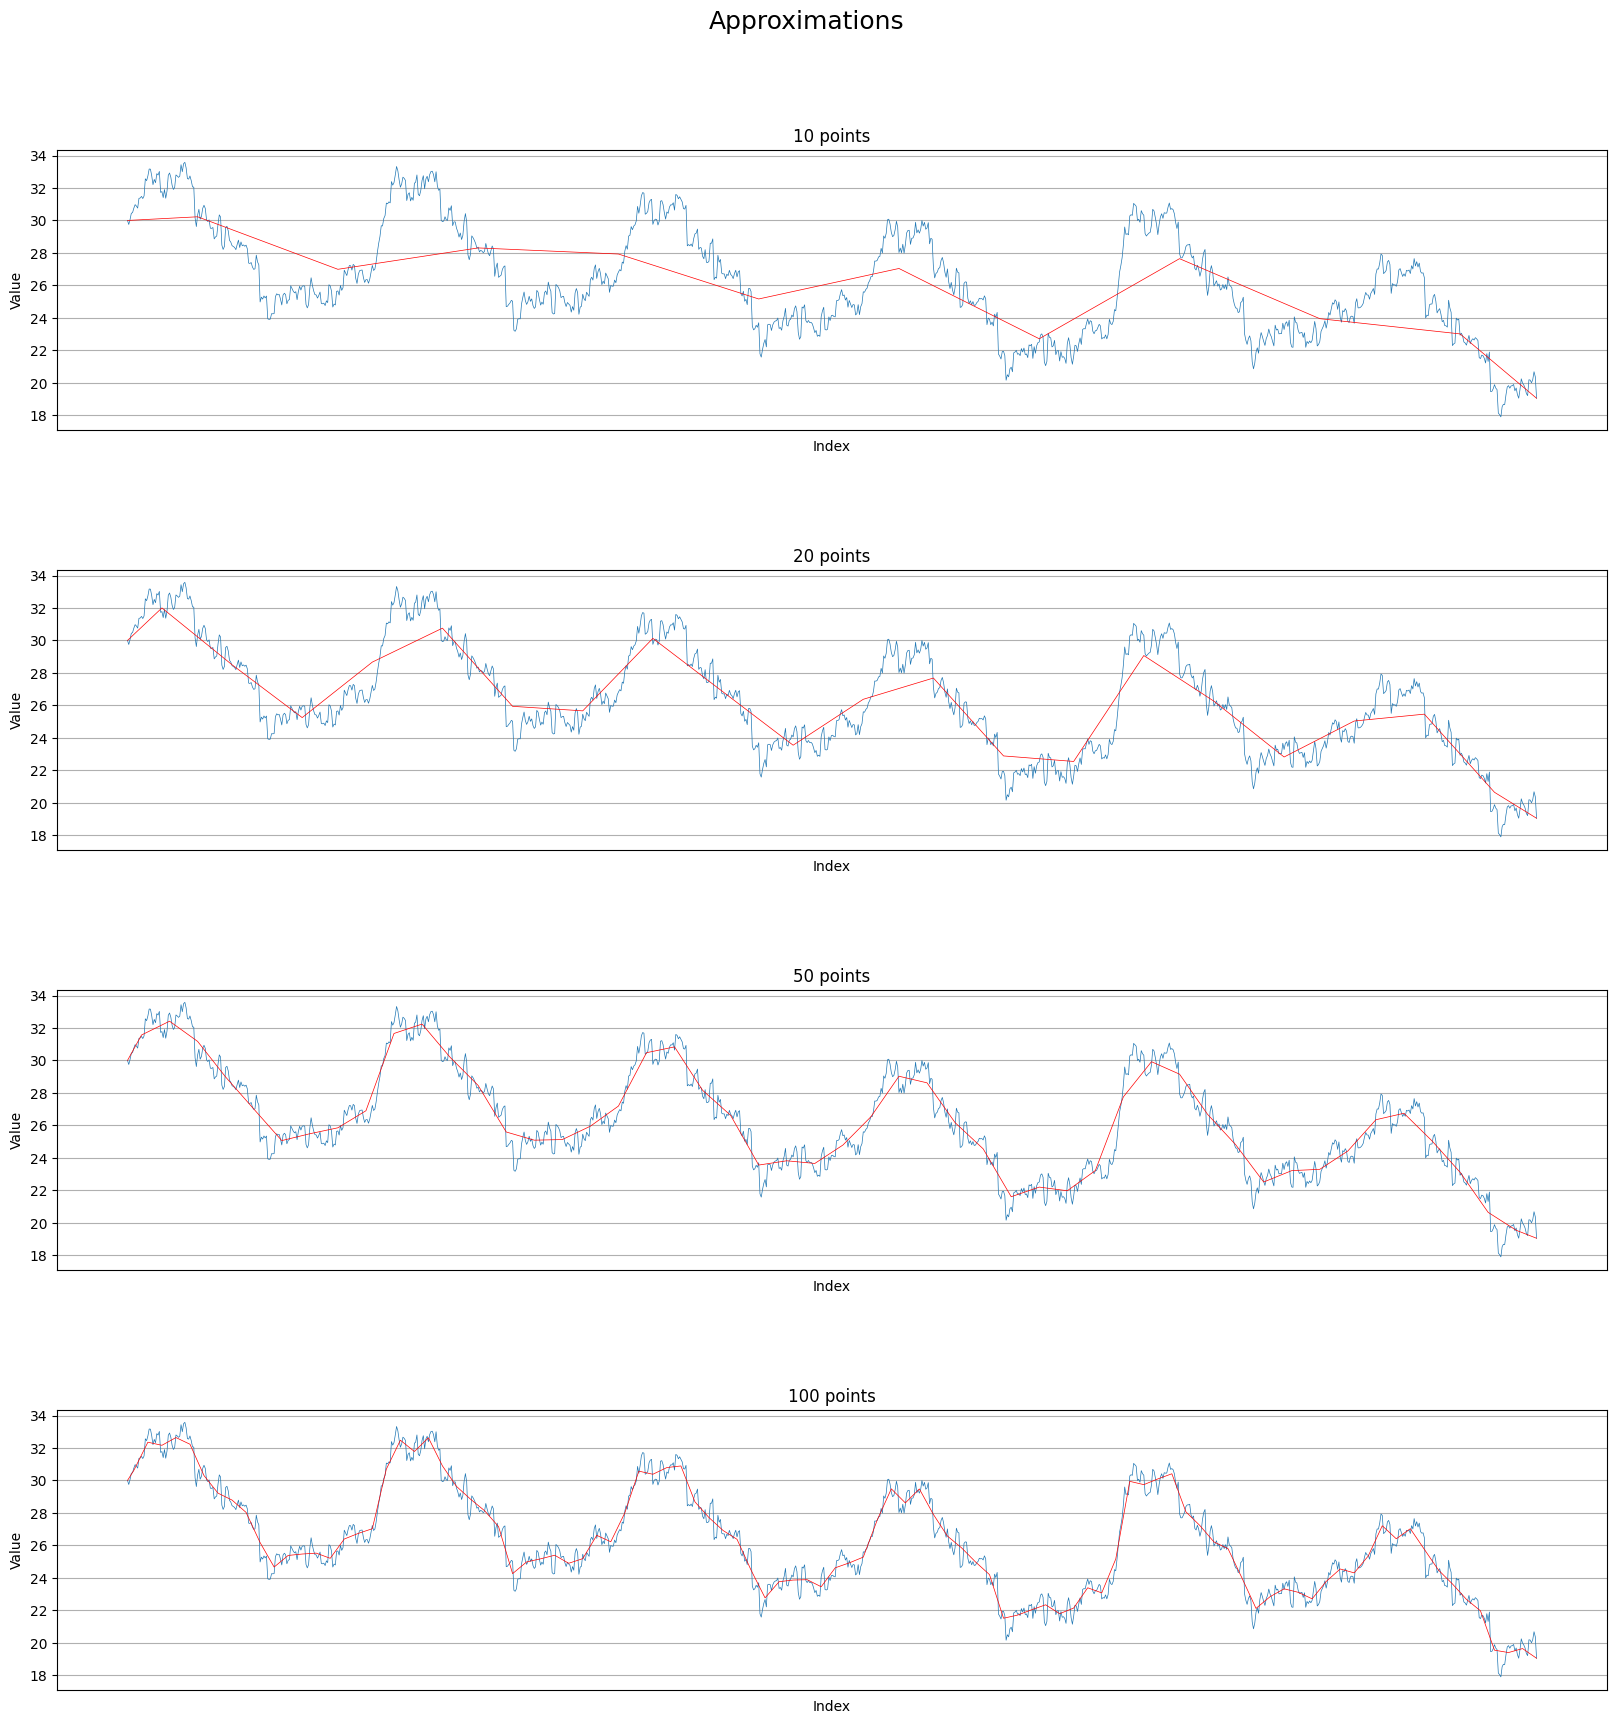

In [7]:
plot_approximations(approximations, 120)

PCA метода работает довольно медленно поэтому сохраним все приблежения в файлы

In [9]:
for (name, data) in approximations.items():
    data.to_csv(os.path.join(DATA_PATH, "Synthesised Time Series", f"synthesised_{name}.csv"), index=False)